# Flagging Loans Project


## Description:

The report will be made on data that contains information on repeated loans from current clients.

Using the available dataset, I will build a model that will predict the value of the target variable `bad_flag` and will argue for the choice of model chosen and show the expected default rate at different approval levels with detailed explanation.

<a id="import"></a>
# <p style="background:#00003f url('pylogo.jpg') no-repeat; font-family:tahoma; font-size:150%; color:white; text-align:center; border-radius:20px 30px; width:95%; padding:30px; font-weight:bold">Phase 1: Importing the needed Libraries and the Dataset</p>

In [1]:
# Let's import the necessary libraries

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

In [2]:
# Read the dataset
df = pd.read_csv("test_task.csv")
df.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0


-----------------------------

<a id="import"></a>
# <p style="background:#00003f url('pylogo.jpg') no-repeat; font-family:tahoma; font-size:150%; color:white; text-align:center; border-radius:20px 30px; width:95%; padding:30px; font-weight:bold">Phase 2: Exploratory Data Analysis</p>

In [3]:
# Checking if there are null values or not:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [4]:
df.select_dtypes(include=['int64', 'float64']).describe()

,loanKey,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,bad_flag
count,4157.000000,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000,4157.000000
mean,525386.651431,1.444444,0.733333,0.280000,1.184693,12.338225,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222,0.100313
std,202001.338206,0.900599,0.764572,0.502339,1.723715,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143,0.300453
min,58567.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000,0.000000
25%,363964.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000,0.000000
50%,543603.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000,0.000000
75%,687271.000000,2.000000,1.000000,1.000000,2.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000,0.000000
max,884377.000000,7.000000,5.000000,3.000000,31.000000,80.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000,1.000000


In [5]:
# df.drop(["first_overdue_date", "rep_loan_date", "first_loan"], axis=1, inplace=False).describe(exclude=[np.number])

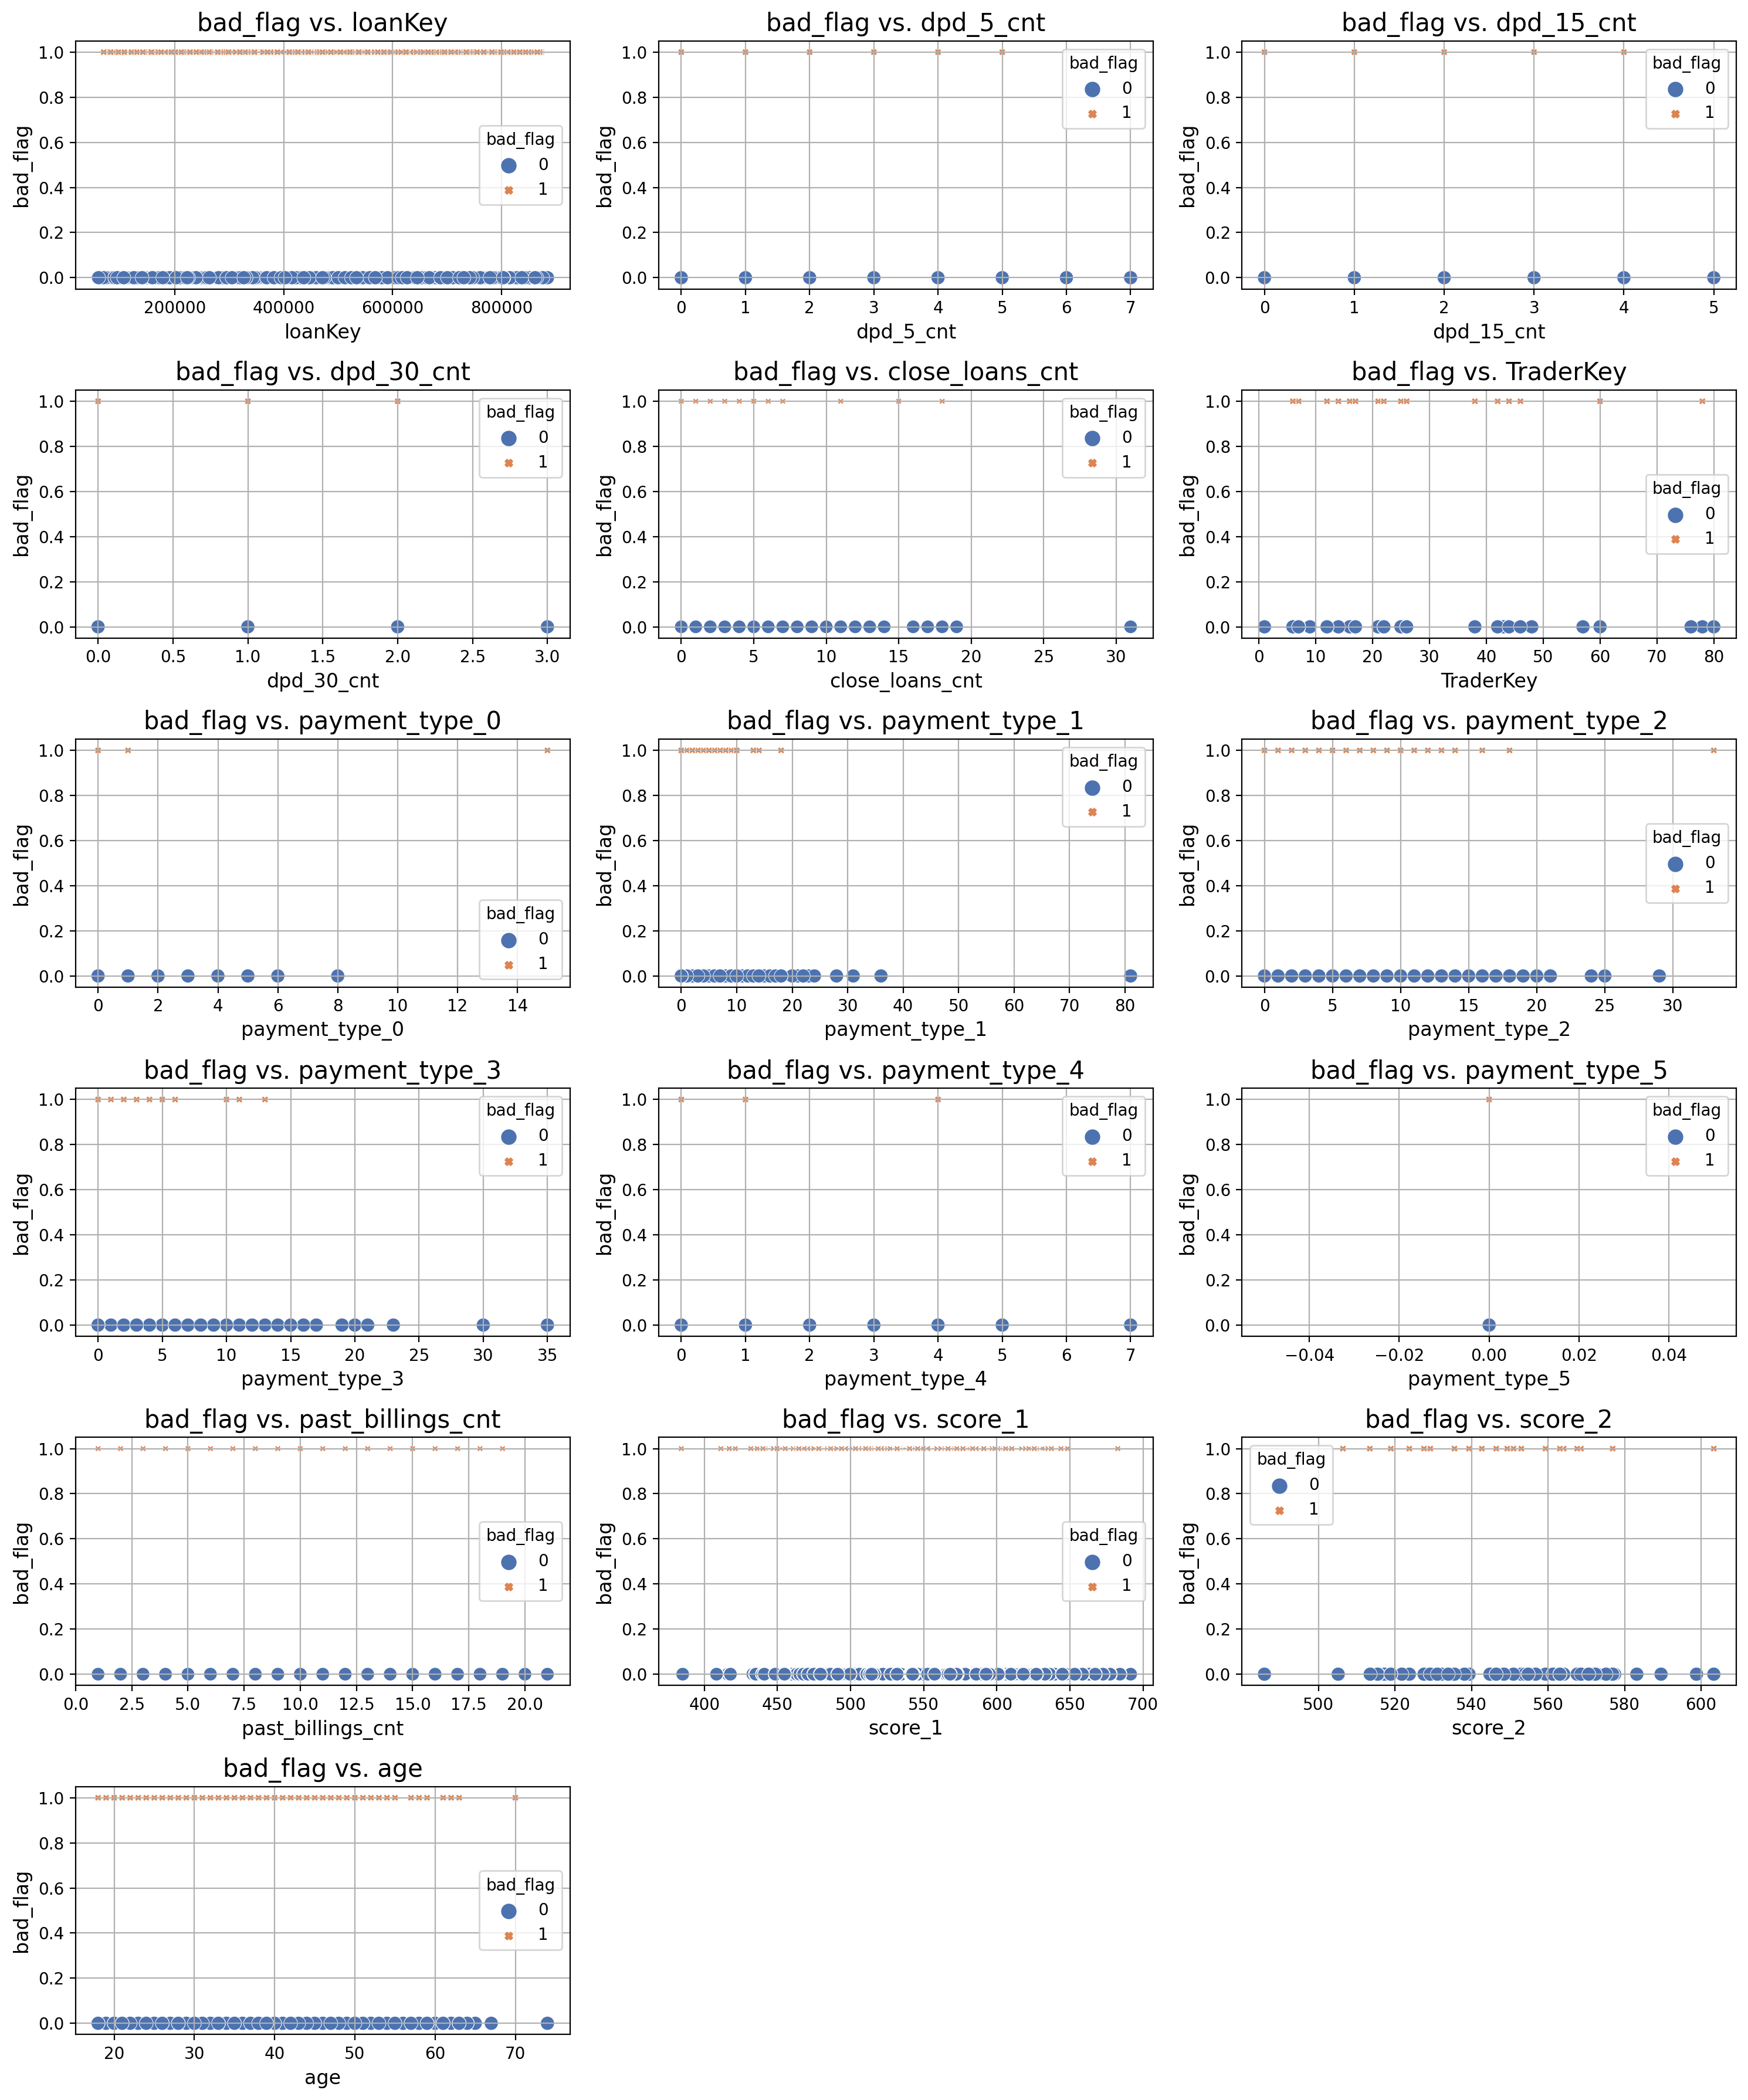

In [10]:
import numpy as np

target = 'bad_flag'
features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da']
CustomPalette = sns.set_palette(sns.color_palette(colors))

# Calculate the number of rows and columns needed
n_features = len(features)
ncols = 3
nrows = int(np.ceil(n_features / ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3), dpi=200)

# Flatten the axes array to iterate over it
ax = ax.flatten()

for i in range(n_features):
    sns.scatterplot(data=df.select_dtypes(include=['int64', 'float64']), x=features[i], y=target, 
                    hue=target, ax=ax[i],style=target,palette="deep",size=target)
    ax[i].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[i].set_xlabel(features[i], size = 12)
    ax[i].set_ylabel(target, size = 12)
    ax[i].grid()

# Remove any unused subplots
if n_features % ncols != 0:
    for j in range(i+1, nrows*ncols):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


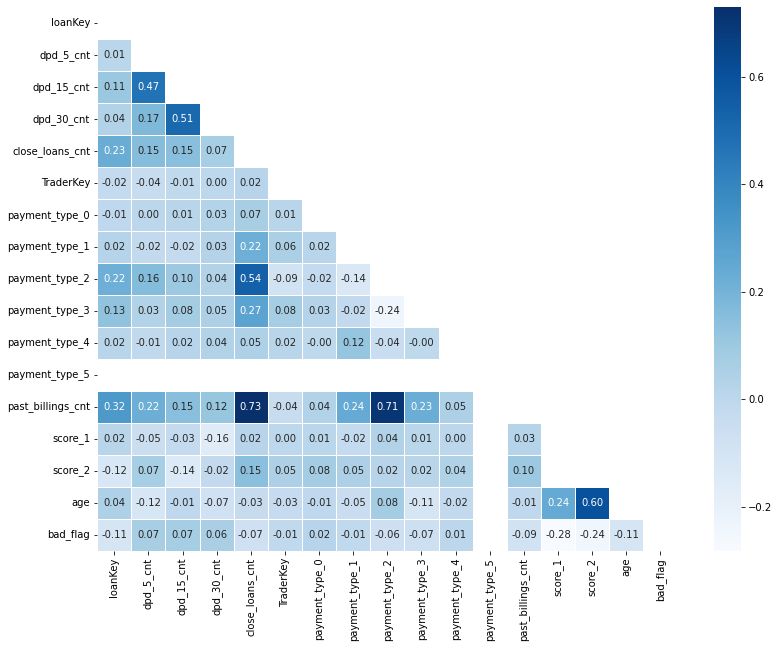

In [14]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

The provided plot is a heatmap that represents the correlation between different variables in the dataset. Each cell in the heatmap corresponds to the correlation coefficient between two variables, with the variable names being indicated on the `x` and `y` axes. The correlation coefficient ranges from `-1` to `1`. 

- A correlation coefficient close to `1` indicates a strong positive correlation, meaning that when one variable increases, the other also tends to increase.
- A correlation coefficient close to `-1` indicates a strong negative correlation, meaning that when one variable increases, the other tends to decrease.
- A correlation coefficient close to `0` indicates no linear relationship between the variables.

In this heatmap, darker blue colors represent stronger positive correlations, while lighter blue to white colors represent weaker correlations. The numbers in each cell represent the actual value of the correlation coefficient.

From the heatmap, we can see that each variable has a perfect positive correlation (1.0) with itself, which is expected. There are also some moderate correlations between other variables indicated by lighter shades of blue.

This type of visualization is useful for quickly identifying relationships between pairs of variables. For example, if two variables are strongly correlated, they might convey similar information to a predictive model, and you might not need to include both.

**Please note that correlation does not imply causation. Even if two variables are strongly correlated, it doesn't necessarily mean that changes in one variable cause changes in the other.**

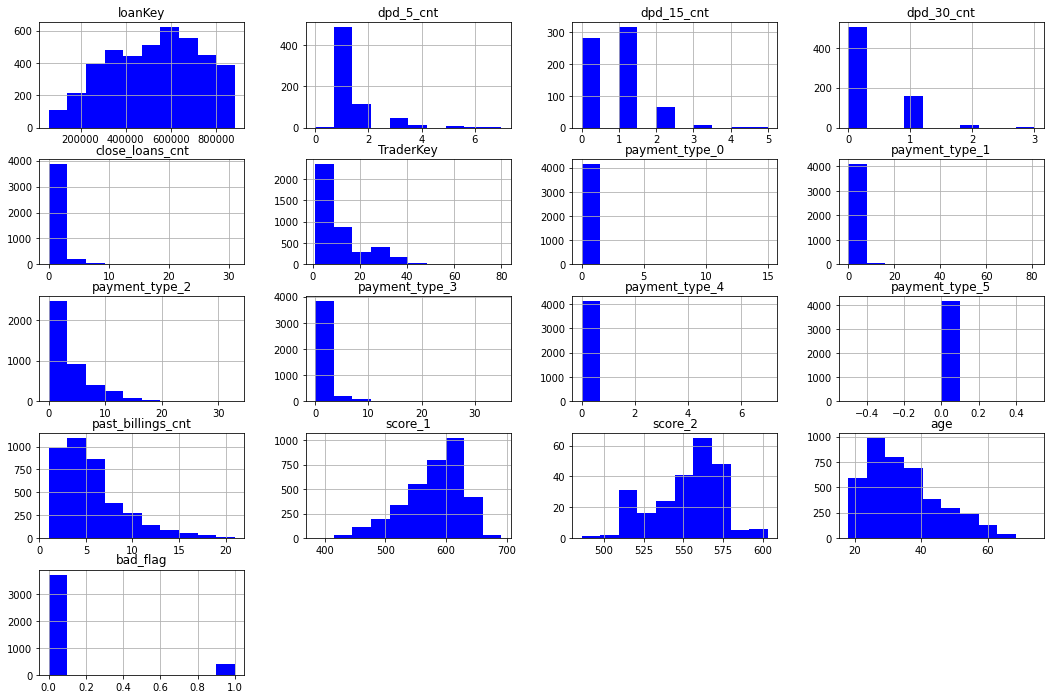

In [35]:
_ = df.hist(figsize=(18, 12), color="blue")

##### Upon examining the histograms, we discern that the target variable `bad_flag`, located in the bottom left of the chart, comprises two classes: `0` and `1`. However, a closer inspection reveals an uneven distribution of observations across these classes. Specifically, the class labeled `0` is significantly overrepresented, while the class `1` is underrepresented. This phenomenon, often encountered in machine learning classification tasks, is referred to as `class imbalance`.

-------

<a id="import"></a>
# <p style="background:#00003f url('pylogo.jpg') no-repeat; font-family:tahoma; font-size:150%; color:white; text-align:center; border-radius:20px 30px; width:95%; padding:30px; font-weight:bold">Phase 3: Feature Engineering</p>

In [ ]:
# @title Synthetically Generating New Date Using SMOTE Part 2

new_data = pd.concat([X_resampled, y_resampled], axis=1)
new_data.head()